In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/Blue Star Computer/Downloads/Superstore Dataset.csv")

In [3]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

## Task 1 

Segment-wise Profit: Kis customer segment (Segment) se sab se zyada Profit (Sales nahi, sirf Profit) aa raha hai? Iska ek Pie Chart banao.

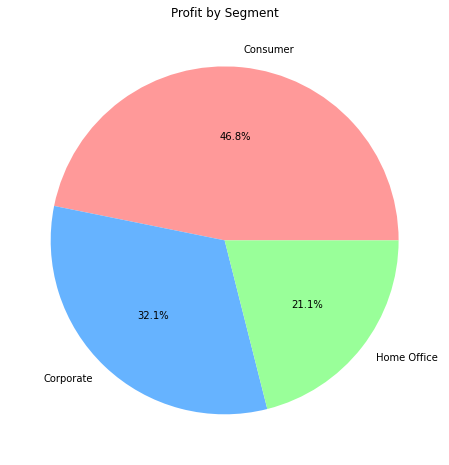

In [7]:
# Segment ke hisab se Profit ka total nikal kar Pie Chart banana
segment_profit = df.groupby('Segment')['Profit'].sum()
segment_profit.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), colors=['#ff9999','#66b3ff','#99ff99'])

plt.title('Profit by Segment')
plt.ylabel('') # Label hatane ke liye
plt.show()

 Question no 2: Top 5 Sub-Categories: Sales ke lihaz se top 5 Sub-Category kaunsi hain? Iska ek Horizontal Bar Plot banao.

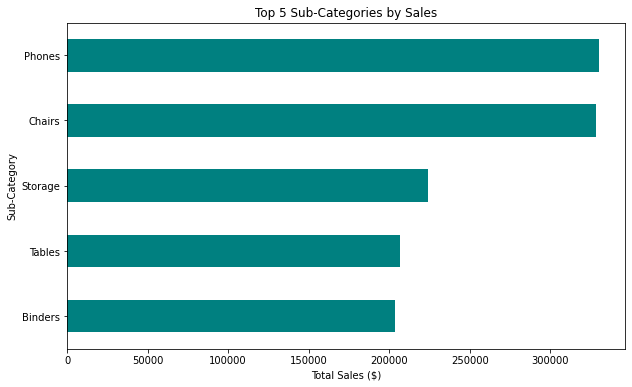

In [8]:
# Sub-Category ke hisab se Sales nikal kar Top 5 ka Horizontal Bar Plot banana
top_5_subcat = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5)

# Plotting (Horizontal Bar Plot)
top_5_subcat.sort_values(ascending=True).plot(kind='barh', color='teal', figsize=(10,6))
plt.title('Top 5 Sub-Categories by Sales')
plt.xlabel('Total Sales ($)')
plt.show()

Question no 3: Discount vs Profit (Correlation): Kya zyada Discount dene se Profit kam ho raha hai? Isko dikhane ke liye ek Scatter Plot banao (x-axis par Discount aur y-axis par Profit rakhein).

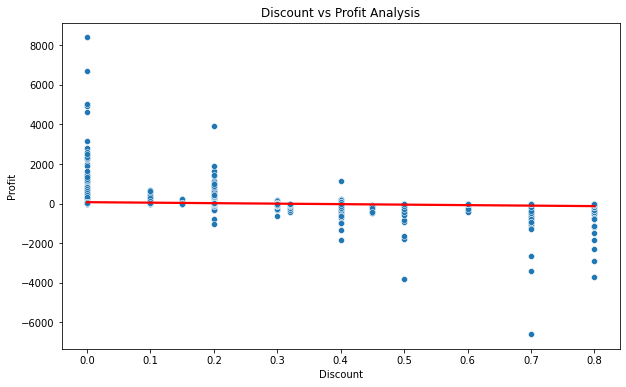

In [9]:
import seaborn as sns

# Scatter plot banana (x-axis: Discount, y-axis: Profit)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount', y='Profit', data=df)

# Trend line add karna taake asar saaf dikhe
sns.regplot(x='Discount', y='Profit', data=df, scatter=False, color='red')

plt.title('Discount vs Profit Analysis')
plt.show()

Result & Insight:
Negative Correlation: Aap plot mein dekh sakte hain ke jaise jaise Discount barh raha hai (x-axis par aage), Profit niche ki taraf ja raha hai (zero se niche minus mein).

Finding: Bohot zyada discount dene se business ko nuksan (Loss) ho raha hai. Khaas taur par 0.5 (50%) se upar ke discounts par profit milna band ho jata hai.

Question no 4: Sawal 1: Monthly Sales Trend (Seasonality)

Business ko yeh janna hai ke saal ke kin mahino mein sales barhti hain (taake wo stock pehle se tayyar rakhein).

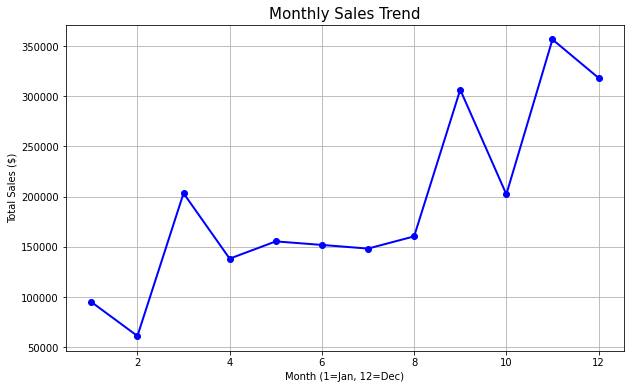

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Date ko datetime format mein convert karna
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 2. Month nikalna
df['Month'] = df['Order Date'].dt.month

# 3. Monthly Sales ka total nikalna
monthly_sales = df.groupby('Month')['Sales'].sum()

# 4. Line Plot banana
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line', marker='o', color='b', linewidth=2)

plt.title('Monthly Sales Trend', fontsize=15)
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

<ipython-input-17-0cfb3bb4d50c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_profit.index, y=avg_profit.values, palette='coolwarm')


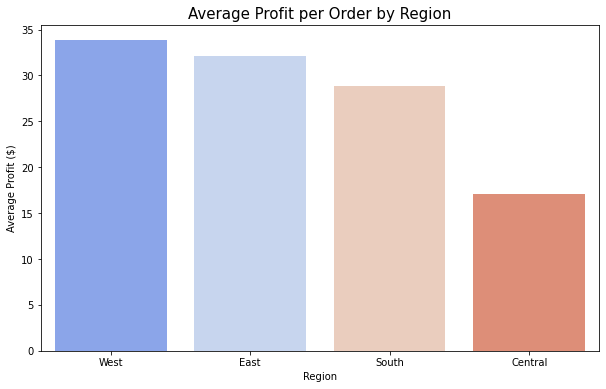

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Region ke hisab se Average Profit nikalna
avg_profit = df.groupby('Region')['Profit'].mean().sort_values(ascending=False)

# 2. Bar Plot banana
plt.figure(figsize=(10,6))
sns.barplot(x=avg_profit.index, y=avg_profit.values, palette='coolwarm')

plt.title('Average Profit per Order by Region', fontsize=15)
plt.ylabel('Average Profit ($)')
plt.show()

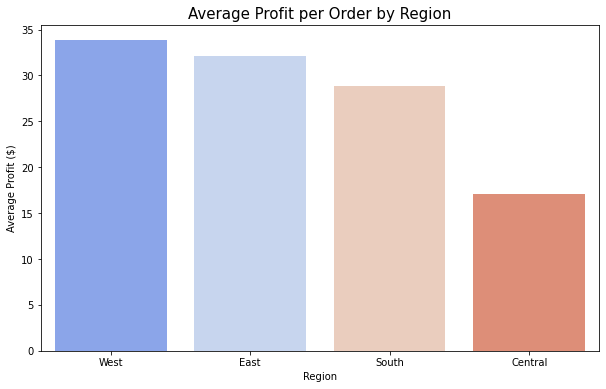

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Average Profit nikalna
avg_profit = df.groupby('Region')['Profit'].mean().sort_values(ascending=False)

# 2. Bar Plot (Updated Line to fix Warning)
plt.figure(figsize=(10,6))
sns.barplot(
    x=avg_profit.index, 
    y=avg_profit.values, 
    hue=avg_profit.index, # x ko hi hue mein daal diya
    palette='coolwarm', 
    legend=False          # Legend ki zarurat nahi hai yahan
)

plt.title('Average Profit per Order by Region', fontsize=15)
plt.ylabel('Average Profit ($)')
plt.show()